<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Lets download the dataset


In [2]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2020-12-16 15:14:24--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2020-12-16 15:14:25 (185 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           0             0     PAIDOFF       1000     30       9/8/2016   
1           2             2     PAIDOFF       1000     30       9/8/2016   
2           3             3     PAIDOFF       1000     15       9/8/2016   
3           4             4     PAIDOFF       1000     30       9/9/2016   
4           6             6     PAIDOFF       1000     30       9/9/2016   

    due_date  age             education  Gender  
0  10/7/2016   45  High School or Below    male  
1  10/7/2016   33              Bechalor  female  
2  9/22/2016   27               college    male  
3  10/8/2016   28               college  female  
4  10/8/2016   29               college    male

In [4]:
df.shape

(346, 10)

### Convert to date time object


In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           0             0     PAIDOFF       1000     30     2016-09-08   
1           2             2     PAIDOFF       1000     30     2016-09-08   
2           3             3     PAIDOFF       1000     15     2016-09-08   
3           4             4     PAIDOFF       1000     30     2016-09-09   
4           6             6     PAIDOFF       1000     30     2016-09-09   

    due_date  age             education  Gender  
0 2016-10-07   45  High School or Below    male  
1 2016-10-07   33              Bechalor  female  
2 2016-09-22   27               college    male  
3 2016-10-08   28               college  female  
4 2016-10-08   29               college    male

# Data visualization and pre-processing


Let’s see how many of each class is in our data set 


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:


In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |             main           3 KB  anaconda
    _py-xgboost-mutex-2.0      |            cpu_0           9 KB  anaconda
    _pytorch_select-0.1        |            cpu_0           2 KB  anaconda
    absl-py-0.10.0             |           py37_0         169 KB  anaconda
    aiohttp-3.6.3              |   py37h7b6447c_0         626 KB  anaconda
    argon2-cffi-20.1.0         |   py37h7b6447c_1         

keyring-18.0.0       | 55 KB     | ##################################### | 100% 
tk-8.6.10            | 3.2 MB    | ##################################### | 100% 
python-3.7.9         | 52.8 MB   | ##################################### | 100% 
fastcache-1.1.0      | 31 KB     | ##################################### | 100% 
gstreamer-1.14.0     | 3.8 MB    | ##################################### | 100% 
pytz-2020.1          | 239 KB    | ##################################### | 100% 
chardet-3.0.4        | 173 KB    | ##################################### | 100% 
parso-0.7.0          | 71 KB     | ##################################### | 100% 
rsa-4.6              | 26 KB     | ##################################### | 100% 
tensorflow-estimator | 273 KB    | ##################################### | 100% 
astor-0.8.1          | 45 KB     | ##################################### | 100% 
mpmath-1.1.0         | 957 KB    | ##################################### | 100% 
nltk-3.5             | 1.1 M

requests-oauthlib-1. | 22 KB     | ##################################### | 100% 
pandoc-2.11          | 12.5 MB   | ##################################### | 100% 
bzip2-1.0.8          | 105 KB    | ##################################### | 100% 
jupyter_core-4.6.3   | 75 KB     | ##################################### | 100% 
pandas-1.1.3         | 10.5 MB   | ##################################### | 100% 
argon2-cffi-20.1.0   | 49 KB     |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/argon2-cffi-20.1.0-py37h7b6447c_1/lib/python3.7/site-packages/argon2/__pycache__/_password_hasher.cpython-37.pyc.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/argon2-cffi-20.1.0-py37h7b6447c_1/lib/python3.7/site-packages/argon2/__pycache__/_ffi_build.cpython-3

numpy-base-1.19.1    | 5.2 MB    | ##################################### | 100% 
jupyterlab_pygments- | 8 KB      | ##################################### | 100% 
pyjwt-1.7.1          | 32 KB     |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/pyjwt-1.7.1-py37_0/lib/python3.7/site-packages/PyJWT-1.7.1.dist-info/METADATA.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/pyjwt-1.7.1-py37_0/lib/python3.7/site-packages/PyJWT-1.7.1.dist-info/entry_points.txt.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/pyjwt-1.7.1-py37_0/lib/python3.7/site-packages/PyJWT-1.7.1.dist-info/LICENSE.  Please remove this file

psycopg2-2.8.5       | 172 KB    | ##################################### | 100% 
snowballstemmer-2.0. | 58 KB     | ##################################### | 100% 
kiwisolver-1.2.0     | 91 KB     | ##################################### | 100% 
pip-20.2.4           | 2.0 MB    | ##################################### | 100% 
retrying-1.3.3       | 15 KB     | ##################################### | 100% 
ipykernel-5.3.4      | 176 KB    | ##################################### | 100% 
ipywidgets-7.5.1     | 102 KB    | ##################################### | 100% 
pyparsing-2.4.7      | 64 KB     |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/pyparsing-2.4.7-py_0/info/licenses/LICENSE.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/pyparsing

freetds-1.00.97      | 2.4 MB    | ##################################### | 100% 
ptyprocess-0.6.0     | 23 KB     | ##################################### | 100% 
protobuf-3.13.0.1    | 700 KB    | ##################################### | 100% 
webencodings-0.5.1   | 19 KB     |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/webencodings-0.5.1-py37_1/lib/python3.7/site-packages/webencodings/__pycache__/tests.cpython-37.pyc.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/webencodings-0.5.1-py37_1/lib/python3.7/site-packages/webencodings/__pycache__/__init__.cpython-37.pyc.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or renam

pillow-8.0.0         | 686 KB    | ##################################### | 100% 
gst-plugins-base-1.1 | 6.3 MB    | ##################################### | 100% 
cytoolz-0.11.0       | 367 KB    | ##################################### | 100% 
mkl-2019.4           | 204.1 MB  | ##################################### | 100% 
iniconfig-1.1.1      | 8 KB      | ##################################### | 100% 
libstdcxx-ng-9.1.0   | 4.0 MB    | ##################################### | 100% 
blas-1.0             | 6 KB      | ##################################### | 100% 
yarl-1.6.2           | 139 KB    | ##################################### | 100% 
matplotlib-base-3.3. | 6.7 MB    | ##################################### | 100% 
pycparser-2.20       | 94 KB     | ##################################### | 100% 
more-itertools-8.5.0 | 42 KB     | ##################################### | 100% 
markdown-3.3.2       | 123 KB    | ##################################### | 100% 
networkx-2.5         | 1.2 M

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/lz4-c-1.9.2-heb0550a_3/include/lz4frame.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/lz4-c-1.9.2-heb0550a_3/include/lz4hc.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/lz4-c-1.9.2-heb0550a_3/include/lz4frame_static.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/lz4-c-1.9.2-heb0550a_3/include/lz4.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Co

hdf5-1.10.4          | 5.3 MB    | ##################################### | 100% 
olefile-0.46         | 48 KB     | ##################################### | 100% 
libpq-12.2           | 2.8 MB    | ##################################### | 100% 
imageio-2.9.0        | 3.1 MB    | ##################################### | 100% 
xz-5.2.5             | 438 KB    | ##################################### | 100% 
dask-core-2.30.0     | 639 KB    | ##################################### | 100% 
python-dateutil-2.8. | 224 KB    | ##################################### | 100% 
toml-0.10.1          | 20 KB     | ##################################### | 100% 
google-auth-oauthlib | 21 KB     | ##################################### | 100% 
multidict-4.7.6      | 69 KB     | ##################################### | 100% 
traitlets-5.0.5      | 81 KB     | ##################################### | 100% 
_py-xgboost-mutex-2. | 9 KB      | ##################################### | 100% 
numpy-1.19.1         | 20 KB

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxcb-1.14-h7b6447c_0/info/recipe/meta.yaml.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxcb-1.14-h7b6447c_0/info/recipe/conda_build_config.yaml.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxcb-1.14-h7b6447c_0/info/repodata_record.json.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxcb-1.14-h7b6447c_0/info/run_exports.json.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unl

matplotlib-3.3.1     | 24 KB     | ##################################### | 100% 
opt_einsum-3.1.0     | 54 KB     | ##################################### | 100% 
pytorch-1.5.0        | 33.3 MB   | ##################################### | 100% 
terminado-0.9.1      | 26 KB     | ##################################### | 100% 
google-pasta-0.2.0   | 44 KB     | ##################################### | 100% 
scikit-learn-0.23.2  | 6.9 MB    | ##################################### | 100% 
keras-preprocessing- | 36 KB     | ##################################### | 100% 
termcolor-1.1.0      | 7 KB      | ##################################### | 100% 
importlib_metadata-2 | 11 KB     | ##################################### | 100% 
html5lib-1.1         | 92 KB     | ##################################### | 100% 
sqlalchemy-1.3.19    | 1.8 MB    | ##################################### | 100% 
pyasn1-modules-0.2.8 | 67 KB     | ##################################### | 100% 
pyopenssl-19.1.0     | 47 KB

libffi-3.3           | 54 KB     | ##################################### | 100% 
markupsafe-1.1.1     | 26 KB     |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/markupsafe-1.1.1-py37h14c3975_1/lib/python3.7/site-packages/MarkupSafe-1.1.1.dist-info/LICENSE.rst.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/markupsafe-1.1.1-py37h14c3975_1/lib/python3.7/site-packages/MarkupSafe-1.1.1.dist-info/METADATA.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/markupsafe-1.1.1-py37h14c3975_1/lib/python3.7/site-packages/MarkupSafe-1.1.1.dist-info/INSTALLER.  Please remove this file manually (you may need to reb

pysocks-1.7.1        | 27 KB     | ##################################### | 100% 
secretstorage-3.1.2  | 23 KB     | ##################################### | 100% 
ipython-7.18.1       | 1.1 MB    | ##################################### | 100% 
ninja-1.10.1         | 1.9 MB    | ##################################### | 100% 
regex-2020.10.15     | 358 KB    | ##################################### | 100% 
pymssql-2.1.5        | 228 KB    | ##################################### | 100% 
certifi-2020.6.20    | 159 KB    | ##################################### | 100% 
libxslt-1.1.34       | 573 KB    | ##################################### | 100% 
entrypoints-0.3      | 12 KB     |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/entrypoints-0.3-py37_0/lib/python3.7/site-packages/__pycache__/entrypoints.cpython-37.pyc.  Please remove this file manually (you may need to reboot to free file 

grpcio-1.31.0        | 2.2 MB    | ##################################### | 100% 
libgfortran-ng-7.3.0 | 1.3 MB    | ##################################### | 100% 
google-auth-1.22.1   | 62 KB     | ##################################### | 100% 
ibm-wsrt-py37main-ma | 2 KB      | ##################################### | 100% 
_pytorch_select-0.1  | 2 KB      | ##################################### | 100% 
xlsxwriter-1.3.7     | 104 KB    | ##################################### | 100% 
botocore-1.19.1      | 4.2 MB    | ##################################### | 100% 
testpath-0.4.4       | 88 KB     | ##################################### | 100% 
wheel-0.35.1         | 36 KB     | ##################################### | 100% 
dbus-1.13.18         | 586 KB    | ##################################### | 100% 
lcms2-2.11           | 419 KB    | ##################################### | 100% 
async_generator-1.10 | 38 KB     | ##################################### | 100% 
oauthlib-3.1.0       | 88 KB

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/pandocfilters-1.4.2-py37_1/info/LICENSE.txt.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/pandocfilters-1.4.2-py37_1/info/paths.json.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/pandocfilters-1.4.2-py37_1/info/files.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/pandocfilters-1.4.2-py37_1/info/hash_input.json.  Please remove this file manually (you may need to reboot to free file handles)
pandocfilters-1.4.2  | 13 KB     | ############################

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/share/doc/libxml2-2.9.10/html/html/libxml-HTMLparser.html.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/share/doc/libxml2-2.9.10/html/html/libxml-debugXML.html.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/share/doc/libxml2-2.9.10/html/html/up.png.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/share/doc/libxml2-2.9.10/html/html/libxml-pattern.html.  

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/share/doc/libxml2-2.9.10/html/html/libxml-c14n.html.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/share/doc/libxml2-2.9.10/html/html/libxml-tree.html.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/share/doc/libxml2-2.9.10/html/html/libxml-chvalid.html.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/share/doc/libxml2-2.9.10/html/html/libxml-xmlunicode.h

jedi-0.17.2          | 950 KB    | ##################################### | 100% 
nest-asyncio-1.4.1   | 10 KB     | ##################################### | 100% 
snappy-1.1.8         | 43 KB     | ##################################### | 100% 
json5-0.9.5          | 22 KB     | ##################################### | 100% 
mkl-service-2.3.0    | 208 KB    | ##################################### | 100% 
cx_oracle-8.0.1      | 186 KB    | ##################################### | 100% 
plotly-4.11.0        | 5.9 MB    | ##################################### | 100% 
patsy-0.5.1          | 375 KB    | ##################################### | 100% 
pyyaml-5.3.1         | 191 KB    | ##################################### | 100% 
jupyterlab_server-1. | 24 KB     | ##################################### | 100% 
dill-0.3.2           | 65 KB     | ##################################### | 100% 
scipy-1.5.2          | 18.5 MB   | ##################################### | 100% 
absl-py-0.10.0       | 169 K

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-58.2-he6710b0_3/lib/pkgconfig/icu-uc.pc.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-58.2-he6710b0_3/lib/pkgconfig/icu-i18n.pc.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-58.2-he6710b0_3/lib/pkgconfig/icu-io.pc.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-58.2-he6710b0_3/lib/icu/58.2/Makefile.inc.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_t

pyzmq-19.0.2         | 499 KB    | ##################################### | 100% 
lxml-4.6.1           | 1.3 MB    | ##################################### | 100% 
pluggy-0.13.1        | 32 KB     | ##################################### | 100% 
scikit-image-0.17.2  | 10.7 MB   | ##################################### | 100% 
prometheus_client-0. | 48 KB     | ##################################### | 100% 
async-timeout-3.0.1  | 12 KB     | ##################################### | 100% 
gast-0.2.2           | 137 KB    | ##################################### | 100% 
xlrd-1.2.0           | 186 KB    | ##################################### | 100% 
nbconvert-6.0.7      | 530 KB    | ##################################### | 100% 
h5py-2.10.0          | 1.2 MB    | ##################################### | 100% 
keras-applications-1 | 30 KB     | ##################################### | 100% 
send2trash-1.5.0     | 16 KB     | ##################################### | 100% 
urllib3-1.25.11      | 93 KB

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/a/atarist-m.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/a/att513.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/a/att730.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/a/aj832.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_r

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/b/bq300-8.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/b/bq300-8rv.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/b/bsdos-pc-m.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/b/bq300-8w.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unl

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/s/screen.linux-m2.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/s/sun.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/s/screen.vte.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/s/screen+fkeys.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.dele

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/l/linux2.6.26.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/l/linux-c.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/l/linux-koi8.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/l/linux-nic.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/n/nwp-511.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/n/news42.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/n/news40-o.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/n/nwp512-a.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_o

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/info/paths.json.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/info/files.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/info/hash_input.json.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/info/has_prefix.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not rem

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/a/adm31.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/a/ansi+sgrul.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/a/att5410v1.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/a/altos-4.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/d/ddr3180.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/d/dt100.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/d/d210-dg.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/d/dgunix+fixed.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/w/wy350-vb.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/w/wy160-vb.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/w/wy350.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/w/wyse160-vb.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/x/xterm+pcc3.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/x/xtalk.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/x/xterm+pcc1.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/x/xterm-1002.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:un

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/i/interix.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/i/ibm5151.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/i/ibm5051.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/i/ibm8512.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or

jupyter_client-6.1.7 | 76 KB     |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/jupyter_client-6.1.7-py_0/info/licenses/COPYING.md.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/jupyter_client-6.1.7-py_0/info/recipe/meta.yaml.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/jupyter_client-6.1.7-py_0/info/recipe/meta.yaml.template.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/jupyter_client-6.1.7-py_0/info/recipe/conda_build_config.yaml.  Please remove thi

idna-2.10            | 56 KB     | ##################################### | 100% 
fontconfig-2.13.0    | 291 KB    | ####################3                 |  55% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/fontconfig-2.13.0-h9420a91_0/include/fontconfig/fontconfig.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/fontconfig-2.13.0-h9420a91_0/include/fontconfig/fcprivate.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/fontconfig-2.13.0-h9420a91_0/include/fontconfig/fcfreetype.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove 

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/fontconfig-2.13.0-h9420a91_0/share/fontconfig/conf.avail/10-sub-pixel-vrgb.conf.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/fontconfig-2.13.0-h9420a91_0/share/fontconfig/conf.avail/30-metric-aliases.conf.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/fontconfig-2.13.0-h9420a91_0/share/fontconfig/conf.avail/11-lcdfilter-default.conf.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/fontconfig-2.13.0-h9420a91_0/share/xml/fontconfig/fonts.dtd.  Please remov

wcwidth-0.2.5        | 37 KB     | ##################################### | 100% 
libpng-1.6.37        | 364 KB    |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libpng-1.6.37-hbc83047_0/include/libpng16/pnglibconf.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libpng-1.6.37-hbc83047_0/include/libpng16/pngconf.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libpng-1.6.37-hbc83047_0/include/libpng16/png.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/l

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libpng-1.6.37-hbc83047_0/include/libpng16/pnglibconf.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libpng-1.6.37-hbc83047_0/include/libpng16/pngconf.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libpng-1.6.37-hbc83047_0/include/libpng16/png.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libpng-1.6.37-hbc83047_0/include/pnglibconf.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:

ca-certificates-2020 | 128 KB    | ##################################### | 100% 
tornado-6.0.4        | 649 KB    | ##################################### | 100% 
threadpoolctl-2.1.0  | 16 KB     | ##################################### | 100% 
intel-openmp-2020.2  | 947 KB    | ##################################### | 100% 
importlib-metadata-2 | 35 KB     | ##################################### | 100% 
packaging-20.4       | 35 KB     |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/packaging-20.4-py_0/info/licenses/LICENSE.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/packaging-20.4-py_0/info/recipe/recipe_log.txt.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or

jeepney-0.4.3        | 22 KB     | ##################################### | 100% 
tensorflow-base-2.1. | 166.1 MB  | ##################################### | 100% 
six-1.15.0           | 13 KB     | ##################################### | 100% 
sympy-1.6.2          | 10.5 MB   | ##################################### | 100% 
libsodium-1.0.18     | 387 KB    | ##################################### | 100% 
zstd-1.4.4           | 1006 KB   | ##################################### | 100% 
py-1.9.0             | 78 KB     | ##################################### | 100% 
pyasn1-0.4.8         | 58 KB     | ##################################### | 100% 
sip-4.19.24          | 297 KB    | ##################################### | 100% 
pyqt-5.9.2           | 5.6 MB    | ##################################### | 100% 
jupyterlab-2.2.6     | 5.9 MB    | ##################################### | 100% 
freetype-2.10.4      | 901 KB    | ##################################### | 100% 
expat-2.2.10         | 192 K

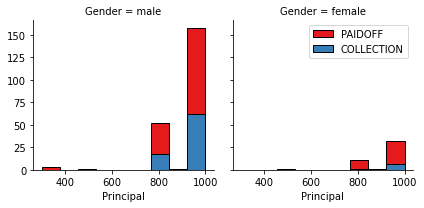

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

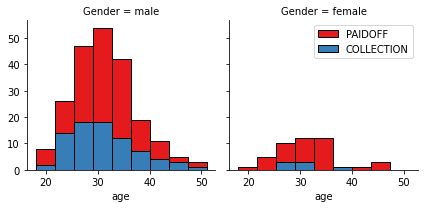

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Lets look at the day of the week people get the loan


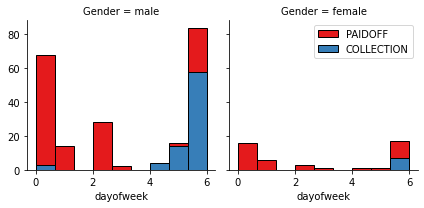

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 


In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           0             0     PAIDOFF       1000     30     2016-09-08   
1           2             2     PAIDOFF       1000     30     2016-09-08   
2           3             3     PAIDOFF       1000     15     2016-09-08   
3           4             4     PAIDOFF       1000     30     2016-09-09   
4           6             6     PAIDOFF       1000     30     2016-09-09   

    due_date  age             education  Gender  dayofweek  weekend  
0 2016-10-07   45  High School or Below    male          3        0  
1 2016-10-07   33              Bechalor  female          3        0  
2 2016-09-22   27               college    male          3        0  
3 2016-10-08   28               college  female          4        1  
4 2016-10-08   29               college    male          4        1

## Convert Categorical features to numerical values


Lets look at gender:


In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           0             0     PAIDOFF       1000     30     2016-09-08   
1           2             2     PAIDOFF       1000     30     2016-09-08   
2           3             3     PAIDOFF       1000     15     2016-09-08   
3           4             4     PAIDOFF       1000     30     2016-09-09   
4           6             6     PAIDOFF       1000     30     2016-09-09   

    due_date  age             education  Gender  dayofweek  weekend  
0 2016-10-07   45  High School or Below       0          3        0  
1 2016-10-07   33              Bechalor       1          3        0  
2 2016-09-22   27               college       0          3        0  
3 2016-10-08   28               college       1          4        1  
4 2016-10-08   29               college       0          4        1

## One Hot Encoding

#### How about education?


In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding


In [15]:
df[['Principal','terms','age','Gender','education']].head()

Principal  terms  age  Gender             education
0       1000     30   45       0  High School or Below
1       1000     30   33       1              Bechalor
2       1000     15   27       0               college
3       1000     30   28       1               college
4       1000     30   29       0               college

#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


Principal  terms  age  Gender  weekend  Bechalor  High School or Below  \
0       1000     30   45       0        0         0                     1   
1       1000     30   33       1        0         1                     0   
2       1000     15   27       0        0         0                     0   
3       1000     30   28       1        1         0                     0   
4       1000     30   29       0        1         0                     0   

   college  
0        0  
1        0  
2        1  
3        1  
4        1

### Feature selection


Lets defind feature sets, X:


In [17]:
X = Feature
X[0:5]

Principal  terms  age  Gender  weekend  Bechalor  High School or Below  \
0       1000     30   45       0        0         0                     1   
1       1000     30   33       1        0         1                     0   
2       1000     15   27       0        0         0                     0   
3       1000     30   28       1        1         0                     0   
4       1000     30   29       0        1         0                     0   

   college  
0        0  
1        0  
2        1  
3        1  
4        1

What are our lables?


In [18]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split )


In [19]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

-   K Nearest Neighbor(KNN)
-   Decision Tree
-   Support Vector Machine
-   Logistic Regression

** Notice:** 

-   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
-   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
-   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [43]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

array([0.67142857, 0.65714286, 0.71428571, 0.68571429, 0.75714286,
       0.71428571, 0.78571429, 0.75714286, 0.75714286, 0.67142857,
       0.7       , 0.72857143, 0.7       , 0.7       , 0.68571429,
       0.72857143, 0.72857143, 0.72857143, 0.7       , 0.68571429,
       0.71428571, 0.68571429, 0.7       , 0.7       , 0.72857143,
       0.71428571, 0.77142857, 0.68571429, 0.78571429, 0.75714286,
       0.78571429, 0.74285714, 0.78571429, 0.78571429, 0.78571429,
       0.75714286, 0.78571429, 0.78571429, 0.78571429, 0.78571429,
       0.77142857, 0.77142857, 0.77142857, 0.78571429, 0.77142857,
       0.78571429, 0.78571429, 0.78571429, 0.78571429])

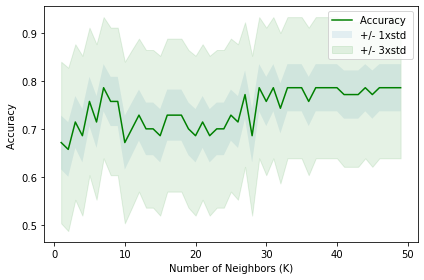

The best accuracy was with 0.7857142857142857 with k= 7 .  This is equal to the jaccard score.


In [24]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1,".  This is equal to the jaccard score.") 

# Decision Tree


In [25]:
#import
from sklearn.tree import DecisionTreeClassifier
from  io import StringIO
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

#Modelling
modeltree = DecisionTreeClassifier(criterion="entropy")
modeltree.fit(X_train, y_train)

#Prediction
predTree = modeltree.predict(X_test)
print(predTree[0:5])
print(y_test[0:5])

names = Feature.columns

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


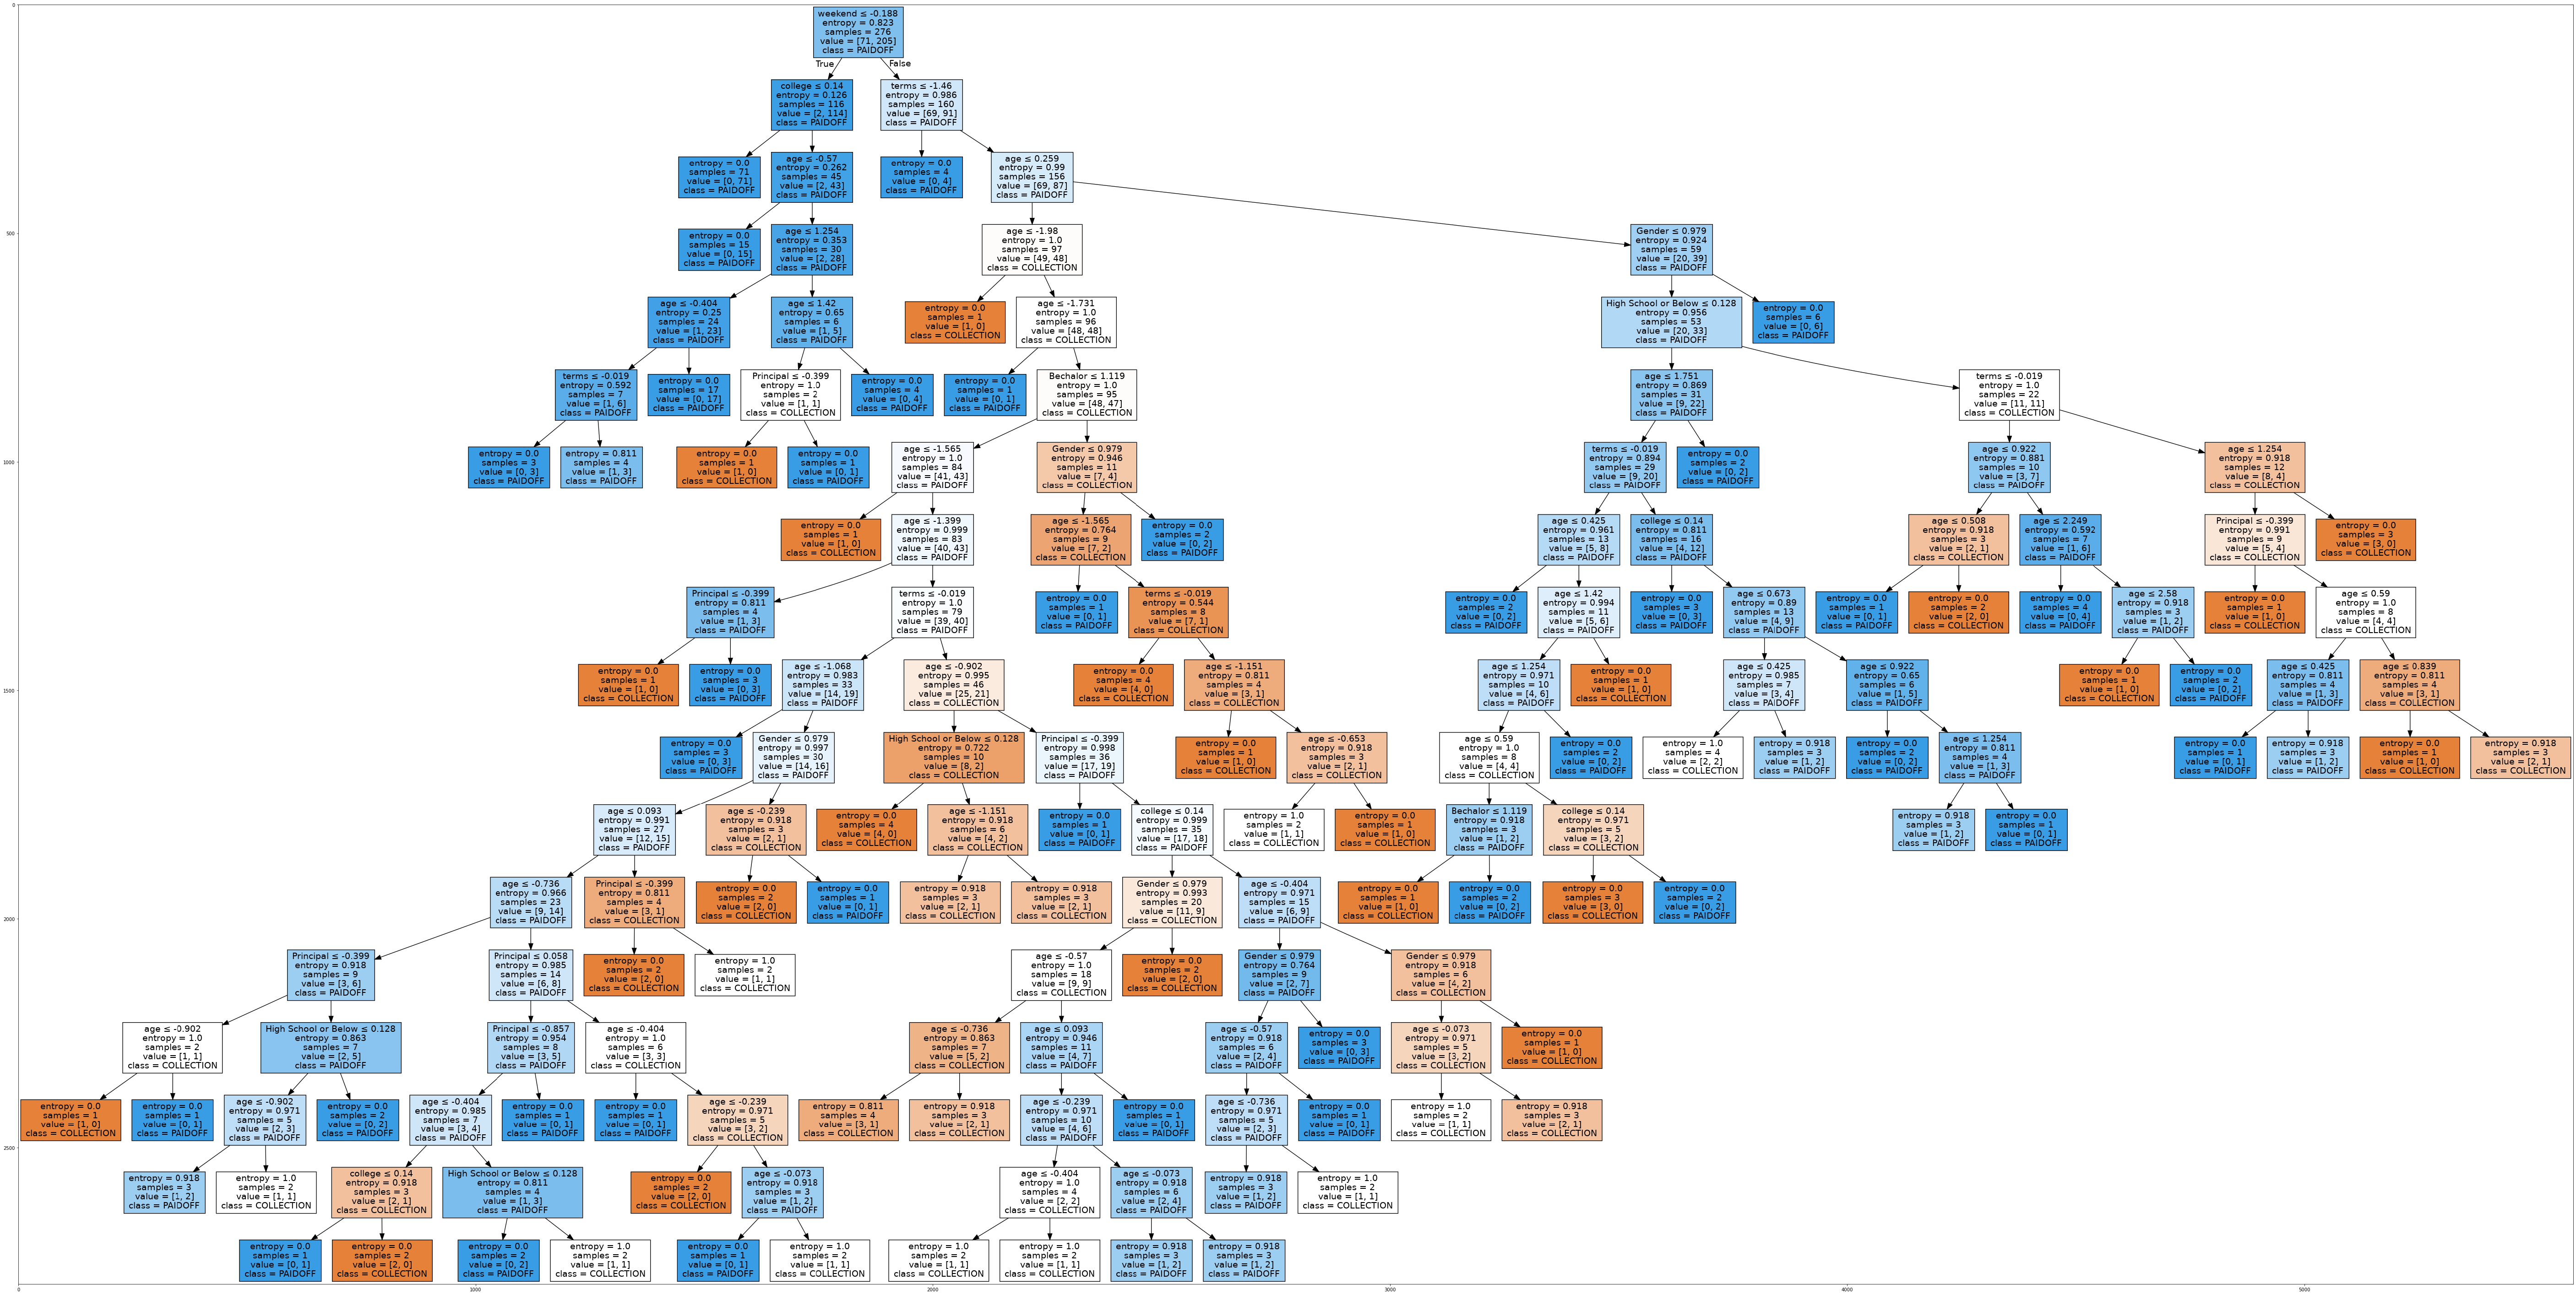

In [24]:
!pip install graphviz
!pip install pydotplus
import graphviz 
import pydotplus

dot_data = StringIO()
filename = "tree.png"
featureNames = Feature.columns
out=tree.export_graphviz(modeltree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [26]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree),".  This is equal to the jaccard score.")

DecisionTrees's Accuracy:  0.7 .  This is equal to the jaccard score.


# Support Vector Machine


In [27]:
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn import svm

#Modelling
clf = svm.SVC(kernel="sigmoid")

clf.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [28]:
#Predict
yhat = clf.predict(X_test)

In [29]:
#Evaluation
from sklearn.metrics import f1_score
f1_score(y_test,yhat, average="weighted")

0.6892857142857144

# Logistic Regression


In [30]:
#Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [31]:
#Predict
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

#Evaluation
from sklearn.metrics import jaccard_score
jaccard_score(y_test,yhat, pos_label = "PAIDOFF")

0.6764705882352942

In [32]:
#Evaluation
f1_score(y_test,yhat, average="weighted")

0.6670522459996144

# Model Evaluation using Test set


In [33]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [34]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-12-16 15:26:38--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2020-12-16 15:26:39 (68.4 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [35]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           1             1     PAIDOFF       1000     30       9/8/2016   
1           5             5     PAIDOFF        300      7       9/9/2016   
2          21            21     PAIDOFF       1000     30      9/10/2016   
3          24            24     PAIDOFF       1000     30      9/10/2016   
4          35            35     PAIDOFF        800     15      9/11/2016   

    due_date  age             education  Gender  
0  10/7/2016   50              Bechalor  female  
1  9/15/2016   35       Master or Above    male  
2  10/9/2016   43  High School or Below  female  
3  10/9/2016   26               college    male  
4  9/25/2016   29              Bechalor    male

ValueError: could not convert string to float: 'female'

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [57]:
from sklearn.metrics import jaccard_score

knn_pred=neigh.predict(X_test)
jc1=jaccard_score(y_test, knn_pred, pos_label = "PAIDOFF")
fs1=f1_score(y_test, neigh.predict(X_test), average='weighted')

tree_pred=modeltree.predict(X_test)
jc2=jaccard_score(y_test, tree_pred, pos_label = "PAIDOFF")
fs2=f1_score(y_test, modeltree.predict(X_test), average='weighted')

svm_pred=clf.predict(X_test)
jc3=jaccard_score(y_test, svm_pred, pos_label = "PAIDOFF")
fs3=f1_score(y_test, clf.predict(X_test), average='weighted')

log_pred=LR.predict(X_test)
proba=LR.predict_proba(X_test)
jc4=jaccard_score(y_test, log_pred, pos_label = "PAIDOFF")
fs4=f1_score(y_test, LR.predict(X_test), average='weighted')  
ll4=log_loss(y_test, proba)

list_jc = [jc1, jc2, jc3, jc4]
list_fs = [fs1, fs2, fs3, fs4]
list_ll = ['NA', 'NA', 'NA', ll4]


import pandas as pd

# fomulate the report format
df = pd.DataFrame(list_jc, index=['KNN','Decision Tree','SVM','Logistic Regression'])
df.columns = ['Jaccard']
df.insert(loc=1, column='F1-score', value=list_fs)
df.insert(loc=2, column='LogLoss', value=list_ll)
df.columns.name = 'Algorithm'
df

Algorithm             Jaccard  F1-score   LogLoss
KNN                  0.785714  0.691429        NA
Decision Tree        0.666667  0.714286        NA
SVM                  0.739130  0.689286        NA
Logistic Regression  0.676471  0.667052  0.577229

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
